In [43]:
import pandas as pd
import datetime as dt
from matplotlib import pyplot as plt
import matplotlib
import scipy
import numpy as np
import seaborn as sns

In [44]:
CVD = pd.read_csv(r"D:\python\3335\untitled\Data\full_data.csv")

In [45]:
CVD.head()

,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
0,06-08-2020,Afghanistan,67.0,4.0,36896.0,1298.0,425.0,27.0,981.0,87.0
1,06-08-2020,Albania,139.0,6.0,5889.0,182.0,784.0,32.0,1531.0,62.0
2,06-08-2020,Algeria,551.0,13.0,33055.0,1261.0,3826.0,75.0,8183.0,150.0
3,06-08-2020,Andorra,0.0,0.0,939.0,52.0,21.0,0.0,50.0,0.0
4,06-08-2020,Angola,180.0,5.0,1344.0,59.0,344.0,12.0,565.0,29.0


In [46]:
CVD.dtypes

date                object
location            object
new_cases          float64
new_deaths         float64
total_cases        float64
total_deaths       float64
weekly_cases       float64
weekly_deaths      float64
biweekly_cases     float64
biweekly_deaths    float64
dtype: object

In [47]:
CVD['date'] = [dt.datetime.strptime(x,'%d-%m-%Y') for x in CVD['date']] 

In [48]:
CVD.dtypes

date               datetime64[ns]
location                   object
new_cases                 float64
new_deaths                float64
total_cases               float64
total_deaths              float64
weekly_cases              float64
weekly_deaths             float64
biweekly_cases            float64
biweekly_deaths           float64
dtype: object

In [49]:
CVD.isnull().sum()

date                  0
location              0
new_cases           326
new_deaths          326
total_cases         326
total_deaths        326
weekly_cases       1108
weekly_deaths      1108
biweekly_cases     2585
biweekly_deaths    2585
dtype: int64

In [50]:
CVD_na = CVD.dropna()
CVD_na

,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
0,2020-08-06,Afghanistan,67.0,4.0,36896.0,1298.0,425.0,27.0,981.0,87.0
1,2020-08-06,Albania,139.0,6.0,5889.0,182.0,784.0,32.0,1531.0,62.0
2,2020-08-06,Algeria,551.0,13.0,33055.0,1261.0,3826.0,75.0,8183.0,150.0
3,2020-08-06,Andorra,0.0,0.0,939.0,52.0,21.0,0.0,50.0,0.0
4,2020-08-06,Angola,180.0,5.0,1344.0,59.0,344.0,12.0,565.0,29.0
...,...,...,...,...,...,...,...,...,...,...
34179,2020-01-13,United Arab Emirates,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34180,2020-01-13,United Kingdom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34181,2020-01-13,United States,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34182,2020-01-13,Vietnam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
CVD_na.isnull().sum()

date               0
location           0
new_cases          0
new_deaths         0
total_cases        0
total_deaths       0
weekly_cases       0
weekly_deaths      0
biweekly_cases     0
biweekly_deaths    0
dtype: int64

In [52]:
CVD_na.describe()

,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
count,32228.000000,32228.000000,3.222800e+04,32228.000000,3.222800e+04,32228.000000,3.222800e+04,32228.000000
mean,1166.035404,43.914546,6.108247e+04,3065.503506,7.840890e+03,299.671156,1.489764e+04,581.899311
std,10397.885052,365.797477,6.017968e+05,27913.149767,7.010725e+04,2455.749532,1.341787e+05,4809.614943
min,-2461.000000,-1918.000000,0.000000e+00,0.000000,-2.372000e+03,-1625.000000,-1.490000e+02,-1616.000000
25%,0.000000,0.000000,5.400000e+01,1.000000,3.000000e+00,0.000000,7.000000e+00,0.000000
50%,9.000000,0.000000,7.350000e+02,13.000000,8.400000e+01,1.000000,1.590000e+02,2.000000
75%,139.000000,3.000000,7.240250e+03,149.000000,9.290000e+02,18.000000,1.732750e+03,34.000000
max,298082.000000,10504.000000,1.879352e+07,707715.000000,1.819572e+06,52256.000000,3.598989e+06,97241.000000


In [53]:
CVD = CVD.drop(['weekly_cases', 'weekly_deaths', 'biweekly_cases','biweekly_deaths'], axis=1)

In [54]:
CVD.columns = ['Date', 'Country', 'New Cases', 'New deaths', 'Total Cases', 'Total Deaths' ]

In [55]:
CVD_no_china = CVD.loc[~(CVD['Country'].isin(["China", "World"]))]

In [56]:
CVD_no_china = pd.DataFrame(CVD_no_china.groupby(['Country', 'Date'])['Total Cases', 'Total Deaths'].sum()).reset_index()

c:\users\mrkoh\pycharmprojects\untitled1\venv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [57]:
CVD_no_china.head()

,Country,Date,Total Cases,Total Deaths
0,Afghanistan,2019-12-31,0.0,0.0
1,Afghanistan,2020-01-01,0.0,0.0
2,Afghanistan,2020-01-02,0.0,0.0
3,Afghanistan,2020-01-03,0.0,0.0
4,Afghanistan,2020-01-04,0.0,0.0


In [58]:
CVD_no_china = CVD_no_china.sort_values(by = ['Country','Date'], ascending=False)

In [59]:
CVD_no_china

,Country,Date,Total Cases,Total Deaths
34627,Zimbabwe,2020-08-06,4339.0,84.0
34626,Zimbabwe,2020-08-05,4221.0,81.0
34625,Zimbabwe,2020-08-04,4075.0,80.0
34624,Zimbabwe,2020-08-03,3921.0,70.0
34623,Zimbabwe,2020-08-02,3659.0,69.0
...,...,...,...,...
4,Afghanistan,2020-01-04,0.0,0.0
3,Afghanistan,2020-01-03,0.0,0.0
2,Afghanistan,2020-01-02,0.0,0.0
1,Afghanistan,2020-01-01,0.0,0.0


In [60]:
def plot_exponential_fit_data_TC(d_df, title, delta):
    d_df = d_df.sort_values(by=['Date'], ascending=True)
    
    d_df['x'] = np.arange(len(d_df)) + 1  #Add column x to the dataframe 
    d_df['y'] = d_df['Total Cases']   #Add column y to the dataframe 
    
    x = d_df['x'][:-delta]  #Remove delta number of data points (so we can predict them)
    y = d_df['y'][:-delta]  #Remove delta number of data points (so we can predict them)
    
    c2 = scipy.optimize.curve_fit(lambda t, a, b: a*np.exp(b*t),  x,  y,  p0=(20, 0.2))
    A, B = c2[0]  #Coefficients
    
    print(f'(y = Ae^(Bx)) A: {A}, B: {B}\n')
    x = range(1,d_df.shape[0] + 1)
    
    y_fit = A * np.exp(B * x)
    f, ax = plt.subplots(1,1, figsize=(12,6))
    
    g = sns.scatterplot(x=d_df['x'][:-delta], y=d_df['y'][:-delta], label='Confirmed cases (used for model creation)', color='red')
    g = sns.scatterplot(x=d_df['x'][-delta:], y=d_df['y'][-delta:], label='Confirmed cases (not used for model, validation)', color='blue')
    g = sns.lineplot(x=x, y=y_fit, label='Predicted values', color='green')  #Predicted
    
    x_future=range(85,90)  
    y_future=A * np.exp(B * x_future)
    print("Expected cases for the next 5 days: \n", y_future)
    
    plt.xlabel('Days since first case')
    plt.ylabel(f'Total cases')
    plt.title(f'Confirmed cases & projected cases: {title}')
    plt.xticks(rotation=90)
    ax.grid(color='black', linestyle='dotted', linewidth=0.75)
    plt.show()

(y = Ae^(Bx)) A: 5936.815869122392, B: 0.015855471659439135

Expected cases for the next 5 days: 
 [22848.55853932 23213.72046902 23584.71835703 23961.64547267
 24344.5965759 ]


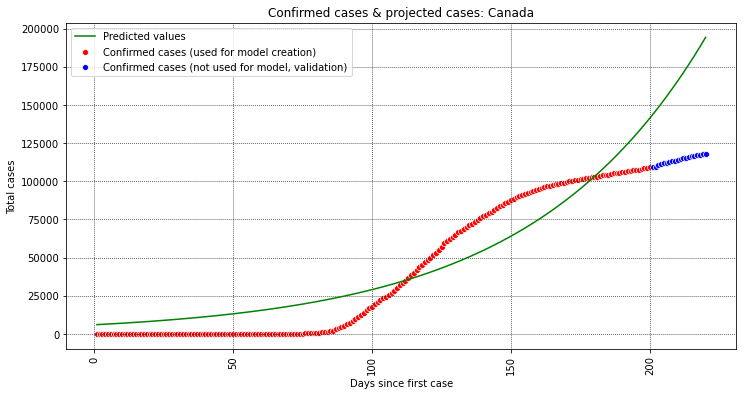

In [68]:
d_df = CVD_Canada.copy()
plot_exponential_fit_data_TC(d_df, 'Canada', 20)

In [62]:
CVD.columns

Index(['Date', 'Country', 'New Cases', 'New deaths', 'Total Cases',
       'Total Deaths'],
      dtype='object')

In [63]:
def plot_exponential_fit_data_TD(d_df, title, delta):
    d_df = d_df.sort_values(by=['Date'], ascending=True)
    
    d_df['x'] = np.arange(len(d_df)) + 1  #Add column x to the dataframe 
    d_df['y'] = d_df['Total Deaths']   #Add column y to the dataframe 
    
    x = d_df['x'][:-delta]  #Remove delta number of data points (so we can predict them)
    y = d_df['y'][:-delta]  #Remove delta number of data points (so we can predict them)
   
    c2 = scipy.optimize.curve_fit(lambda t, a, b: a*np.exp(b*t),  x,  y,  p0=(20, 0.2)) 
    
    A, B = c2[0]  #Coefficients
    print(f'(y = Ae^(Bx)) A: {A}, B: {B}\n')
    
    x = range(1,d_df.shape[0] + 1)
    y_fit = A * np.exp(B * x)
    
    f, ax = plt.subplots(1,1, figsize=(12,6))
    
    g = sns.scatterplot(x=d_df['x'][:-delta], y=d_df['y'][:-delta], label='Confirmed cases (used for model creation)', color='red')
    g = sns.scatterplot(x=d_df['x'][-delta:], y=d_df['y'][-delta:], label='Confirmed cases (not used for model, validation)', color='blue')
    g = sns.lineplot(x=x, y=y_fit, label='Predicted values', color='green')  #Predicted
    
    x_future=range(85,90)  
    y_future=A * np.exp(B * x_future)
    print("Expected cases for the next 5 days: \n", y_future)
    
    plt.xlabel('Days since first case')
    plt.ylabel(f'Total cases')
    plt.title(f'Confirmed cases & projected cases: {title}')
    plt.xticks(rotation=90)
    ax.grid(color='black', linestyle='dotted', linewidth=0.75)
    plt.show()

(y = Ae^(Bx)) A: 9.264340489718567e-15, B: 0.1999999896388583

Expected cases for the next 5 days: 
 [2.23779510e-07 2.73324908e-07 3.33839793e-07 4.07752839e-07
 4.98030437e-07]


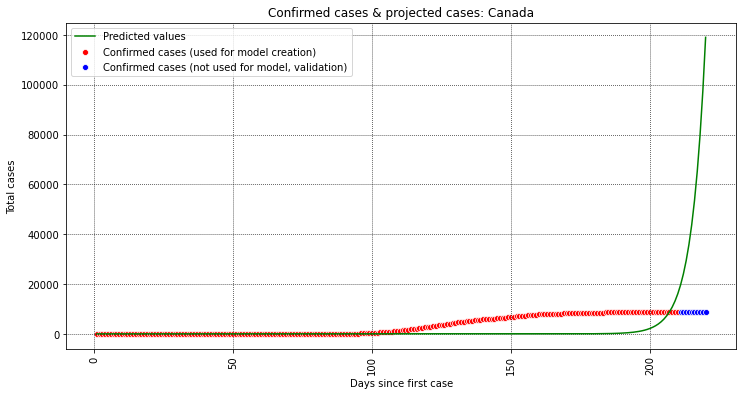

In [64]:
CVD_Canada = CVD_no_china[CVD_no_china['Country']=='Canada']

d_df = CVD_Canada.copy()
plot_exponential_fit_data_TD(d_df, 'Canada', 10)